## 1. Load the data

In [1]:
import pandas as pd

df = pd.read_csv('financial_regression.csv')
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


## 2. Data Preprocessing
### 2.1. Missing values

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [3]:
# Convert the date column to 3 columns which includes the date, month and year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.drop(columns=['date'], inplace=True)
df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high-low,gold open,gold high,gold low,gold close,gold volume,year,month,day,day_of_week
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,1.16,111.51,112.37,110.79,112.03,18305238.0,2010,1,14,3
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,1.36,111.35,112.01,110.38,110.86,18000724.0,2010,1,15,4
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,18,0
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,1.38,110.95,111.75,110.83,111.52,10467927.0,2010,1,19,1
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,2.14,109.97,110.05,108.46,108.94,17534231.0,2010,1,20,2


Drop the columns us_rates_%, CPI, GDP cause they have many null values.

In [4]:
df = df.drop(columns=['us_rates_%', 'CPI', 'GDP'])

In [5]:
# Identify rows where all features except 'date' are NaN
empty_feature_rows = df.drop(columns=['year', 'month', 'day', 'day_of_week']).isna().all(axis=1)
print("Rows with only date and no data:", empty_feature_rows.sum())

# Remove rows where all features except 'date' are NaN  
df = df[~df.drop(columns=['year', 'month', 'day', 'day_of_week']).isna().all(axis=1)]


Rows with only date and no data: 168


In [6]:
df.isnull().sum()

sp500 open            17
sp500 high            17
sp500 low             17
sp500 close           17
sp500 volume          17
sp500 high-low        17
nasdaq open           17
nasdaq high           17
nasdaq low            17
nasdaq close          17
nasdaq volume         17
nasdaq high-low       17
usd_chf               42
eur_usd               42
silver open           17
silver high           17
silver low            17
silver close          17
silver volume         17
silver high-low       17
oil open              17
oil high              17
oil low               17
oil close             17
oil volume            17
oil high-low          17
platinum open         17
platinum high         17
platinum low          17
platinum close        17
platinum volume       17
platinum high-low     17
palladium open        17
palladium high        17
palladium low         17
palladium close       17
palladium volume      17
palladium high-low    17
gold open             17
gold high             17


In [7]:
# Fill missing values with the mean of each column
df = df.copy()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low              0
gold close      

### 2.2. Correlation Matrix 

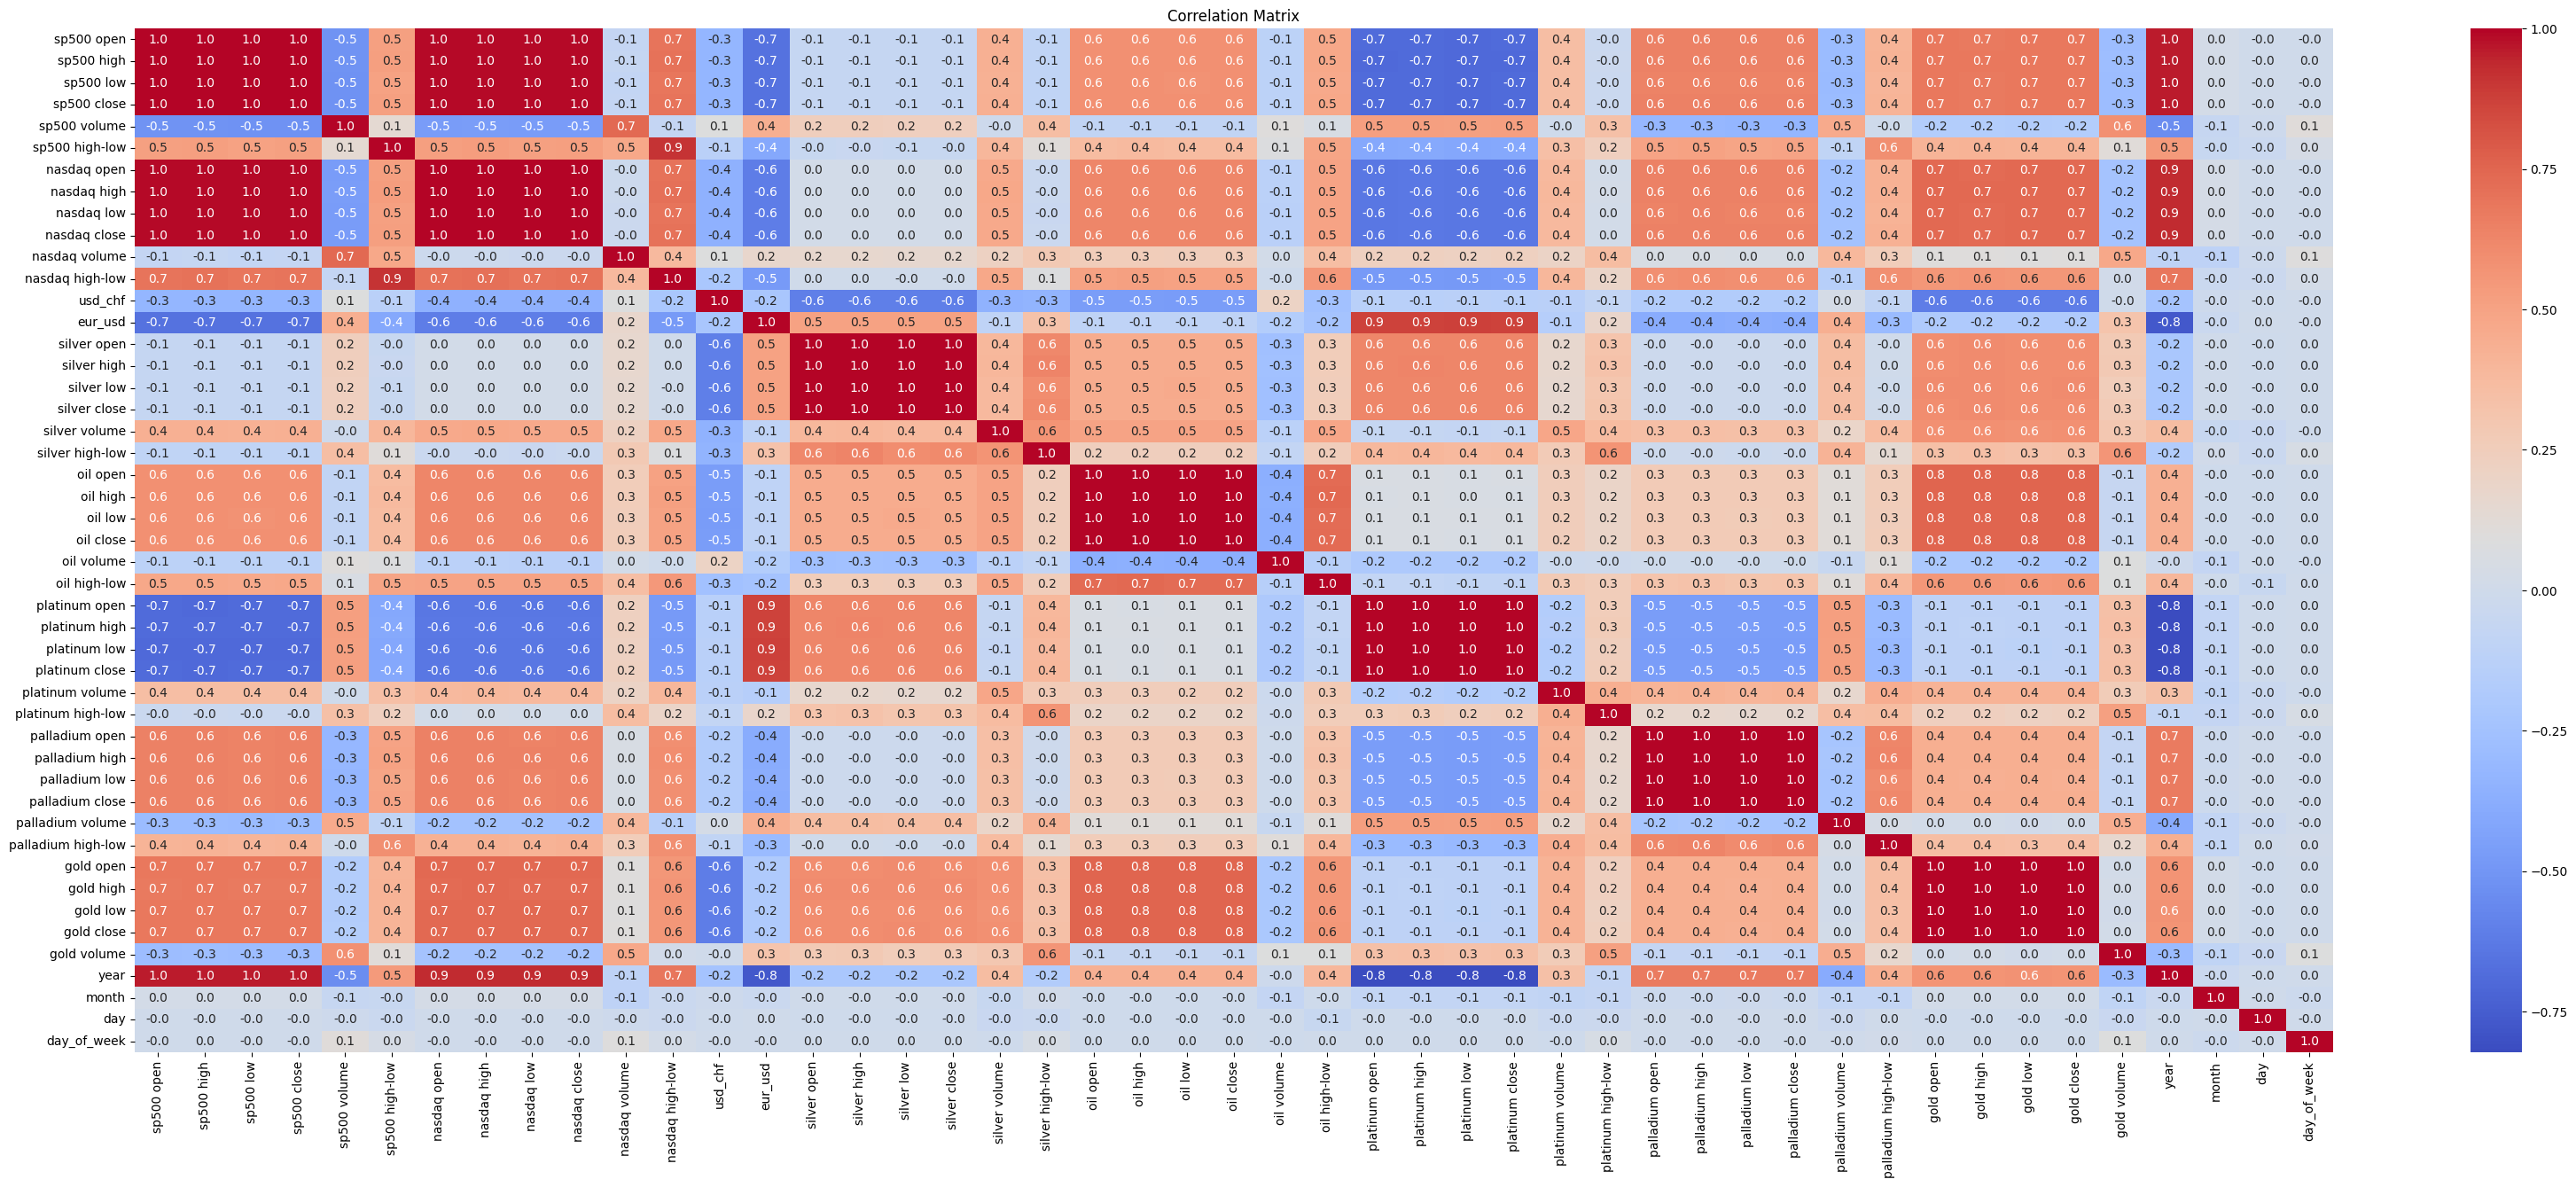

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()    
plt.figure(figsize=(40, 15))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:
# 'gold high' has the highest correlation with other features   
# Display the correlation of all features with 'gold high'
target = 'gold high'
corr_target = df.corr()[target].sort_values(ascending=False)
print(corr_target)

gold high             1.000000
gold open             0.999763
gold close            0.999743
gold low              0.999615
oil close             0.754128
oil high              0.753989
oil low               0.753890
oil open              0.753869
nasdaq high           0.736806
nasdaq open           0.736407
nasdaq close          0.736326
nasdaq low            0.735915
sp500 high            0.679919
sp500 close           0.679190
sp500 open            0.679174
sp500 low             0.678383
silver low            0.602635
silver close          0.602058
silver open           0.601710
silver high           0.601463
silver volume         0.586430
year                  0.568280
nasdaq high-low       0.559368
oil high-low          0.554446
palladium high        0.440258
palladium open        0.438780
palladium close       0.438294
palladium low         0.436607
platinum volume       0.422370
sp500 high-low        0.418188
palladium high-low    0.354457
silver high-low       0.349777
platinum

In [10]:
# Drop columns with low correlation to 'gold high'
# features (open, close, low) of other commodities with low correlation to 'gold high'  
df = df.drop(['gold open', 'gold close', 'gold low'], axis=1, errors='ignore')
df = df.drop(['oil open', 'oil close', 'oil low'], axis=1, errors='ignore')

df = df.drop(['platinum open', 'platinum close', 'platinum low'], axis=1, errors='ignore')
df = df.drop(['nasdaq open', 'nasdaq close', 'nasdaq low'], axis=1, errors='ignore')
df = df.drop(['sp500 open', 'sp500 close', 'sp500 low'], axis=1, errors='ignore')
df = df.drop(['silver open', 'silver close', 'silver low'], axis=1, errors='ignore')
df = df.drop(['palladium open', 'palladium close', 'palladium low'], axis=1, errors='ignore')

In [11]:
# %pip install statsmodels

### 2.3. Variance Inflation Factor (VIF) 

Multicollinearity (Đa cộng tuyến) occurs when two or more independent variables in regression models are highly correlated with each other, meaning they contain overlapping or redundant information. 

Eg: if sp500 high increases, sp500 close also increase -so- they contain the same infor

VIF (Varoance Inflation Factor) is a quantitative measure of multicollinearity. It measures how much a feature (X) can be predicted by other features in the model. If a feature can be predicted well from other features → high multicollinearity → high VIF.



Using Multicollinearity when linear-based model, if using Random Forest, XGBoost, NN dont need to use this method. 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
# Calculate VIF for each feature
X = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


               feature         VIF
0           sp500 high  629.578733
1         sp500 volume   21.980217
2       sp500 high-low   22.224987
3          nasdaq high  370.498410
4        nasdaq volume   20.242199
5      nasdaq high-low   23.925299
6              usd_chf  233.919055
7              eur_usd  384.885930
8          silver high  133.389944
9        silver volume    4.345492
10     silver high-low    7.603898
11            oil high   30.068198
12          oil volume    1.697790
13        oil high-low    6.620169
14       platinum high  245.536265
15     platinum volume    3.909737
16   platinum high-low    9.260217
17      palladium high   14.004160
18    palladium volume    2.908088
19  palladium high-low    4.323437
20           gold high  296.390659
21         gold volume    8.240831


In [13]:
# Drop features which have VIF
df = df.drop(['sp500 high','nasdaq high','year','platinum high','nasdaq high-low'], axis = 1, errors = 'ignore')
print(df.columns)

Index(['sp500 volume', 'sp500 high-low', 'nasdaq volume', 'usd_chf', 'eur_usd',
       'silver high', 'silver volume', 'silver high-low', 'oil high',
       'oil volume', 'oil high-low', 'platinum volume', 'platinum high-low',
       'palladium high', 'palladium volume', 'palladium high-low', 'gold high',
       'gold volume', 'month', 'day', 'day_of_week'],
      dtype='object')


## 3. Machine Learning Models 
### 3.1. Random Forest with Importance Features

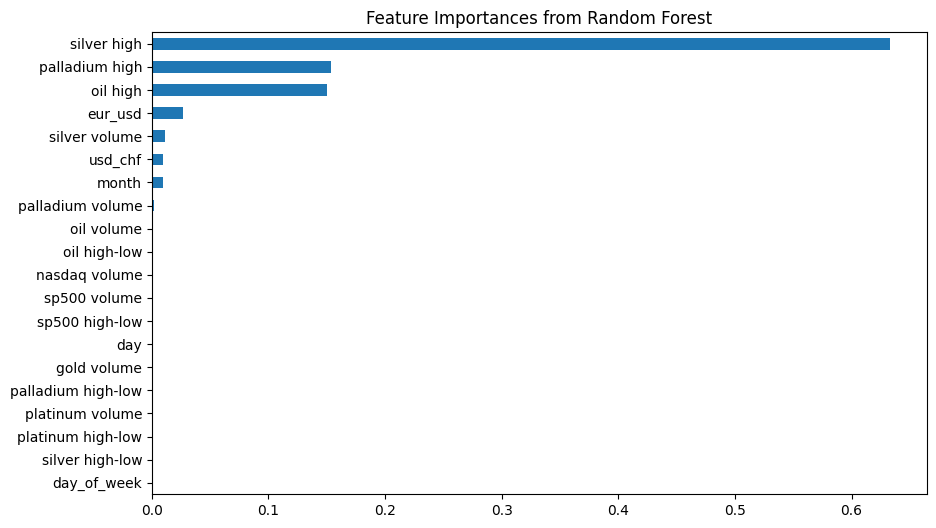

In [14]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 


X = df.drop('gold high', axis=1)
y = df['gold high']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False) 

plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.show()

In [15]:
# Removing least important features and keep those with importance greater than 0.01
importances = pd.Series(model.feature_importances_, index=X.columns )
selected_features = importances[importances > 0.01].index.tolist()
print("Selected features based on importance:\n", selected_features)
df = df[selected_features + ['gold high']]
print(df.columns)

Selected features based on importance:
 ['eur_usd', 'silver high', 'silver volume', 'oil high', 'palladium high']
Index(['eur_usd', 'silver high', 'silver volume', 'oil high', 'palladium high',
       'gold high'],
      dtype='object')


In [16]:
df.head()

,eur_usd,silver high,silver volume,oil high,palladium high,gold high
0,1.4478,18.70,69804.0,39.4400,45.02,112.37
1,1.4376,18.54,205106.0,39.0200,45.76,112.01
3,1.4269,18.79,130552.0,38.9499,47.08,111.75
4,1.4094,18.31,230907.0,38.3500,47.31,110.05
5,1.4106,17.91,198067.0,38.4100,46.98,108.78


In [17]:
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df['gold high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3.2. Linear Regression 

The goal of linear regression is to find a straight line that minimizes the error (the difference) between the observed data points and the predicted values. This line helps us predict the dependent variable for new, unseen data.

**Advantage**: Highly interpretable due to its simple mathematical structure

**Disadvantage**: Cannot capture curved or complex data patterns

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. Mean Absoluate Error (MAE): measure the accuracy of model by calculating the avarage absolute difference between the observed and predicted values. 
2. Mean Square Error (MSE): measure the accuracy of a models'prediction.

In [19]:
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression() 
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_lr_pred)
mse = mean_squared_error(y_test, y_lr_pred)
r2 = r2_score(y_test, y_lr_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Mean Absolute Error: 9.19
Mean Squared Error: 166.06
R^2 Score: 0.81

Feature Coefficients:
          Feature  Coefficient
1     silver high    18.140721
3        oil high    10.540031
4  palladium high     5.616050
2   silver volume     1.881492
0         eur_usd   -11.177142


The linear regression achieved an R^2 of 0.81, indicating that 81% of the variance in the target variable can be explained by the selected predictors. 

The MAE and MSE values suggest low prediction errors. 

Coefficient estimates positive relationship between gold and features (silver, oil, palladium). However, negative coefficient for eur_usd is -11 -> inverse relationship with the target.

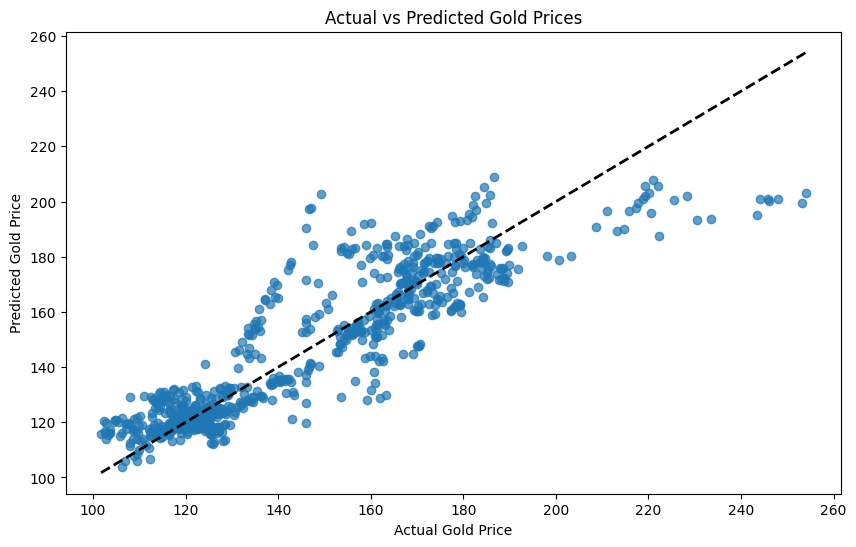

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices")
plt.show()

### 3.3. Polynomial Regression

Polynomial Regression models is non-linear relationships by transforming input features into higher-degree polynomial terms. Although it fits non-linear curves it remains a linear model in terms of parameters. 

**Advantage:** Effectively captures non-linear relationships without switching to non-linear algorithms

**Disadvantage:** Higher-degree polynomials may lead to overfitting and unstable predictions

In [21]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_poly_pred = lr_poly.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Mean Absolute Error (Polynomial Regression): {mae_poly:.2f}")
print(f"Mean Squared Error (Polynomial Regression): {mse_poly:.2f}")
print(f"R^2 Score (Polynomial Regression): {r2_poly:.2f}")

feature_names = poly.get_feature_names_out(selected_features)
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_poly.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

Mean Absolute Error (Polynomial Regression): 5.55
Mean Squared Error (Polynomial Regression): 60.97
R^2 Score (Polynomial Regression): 0.93

Feature Coefficients:
                         Feature  Coefficient
1                    silver high    21.379522
4                 palladium high     7.607446
3                       oil high     6.247802
12          silver high oil high     4.456048
9         eur_usd palladium high     4.154050
2                  silver volume     3.405100
17                    oil high^2     1.842620
10                 silver high^2     0.763091
16  silver volume palladium high     0.583549
19              palladium high^2    -0.002398
5                      eur_usd^2    -0.178454
14               silver volume^2    -0.229192
7          eur_usd silver volume    -0.396228
11     silver high silver volume    -0.654637
15        silver volume oil high    -1.474256
8               eur_usd oil high    -3.460925
13    silver high palladium high    -5.023817
18       

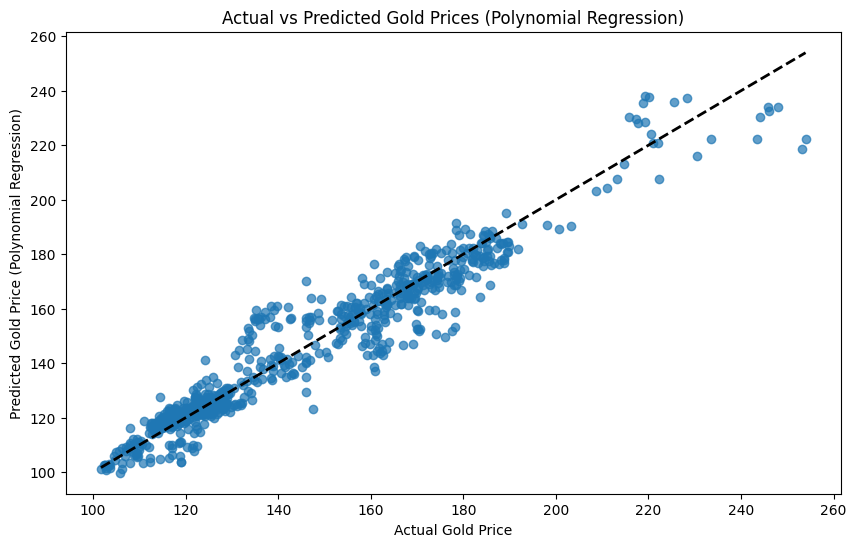

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max
()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (Polynomial Regression)")
plt.title("Actual vs Predicted Gold Prices (Polynomial Regression)")
plt.show()


### 3.4. Ridge Regression 

Ridge Regression is version of linear regression but adds an L2 penalty to control large coeffiicient values. 

While Linear Regression only minimizes prediction error, it can become unstable when features are highly correlated. Ridge solves this by shrinking coefficients making the model more stable and reducing overfitting.

**Advantage:** Controls overfitting and improves generalization, especially with many predictors

**Disadvantage:** Penalty terms make model interpretation less straightforward

Best alpha for Ridge Regression: 0.1
Mean Absolute Error (Ridge Regression): 9.19
Mean Squared Error (Ridge Regression): 166.06
R^2 Score (Ridge Regression): 0.81

Feature Coefficients (Ridge Regression):
          Feature  Coefficient
1     silver high    18.139190
3        oil high    10.540217
4  palladium high     5.616036
2   silver volume     1.882083
0         eur_usd   -11.175924


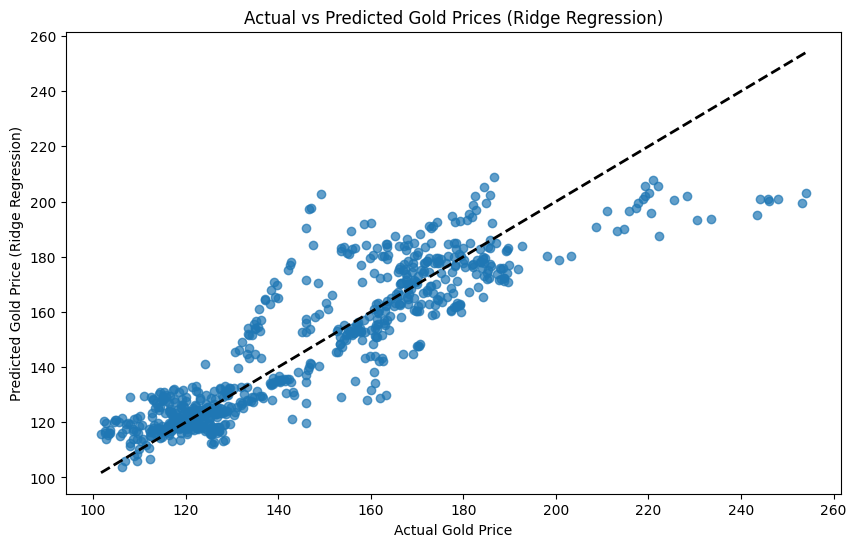

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge  

ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
best_ridge = grid_search.best_estimator_
y_ridge_pred = best_ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)
print(f"Best alpha for Ridge Regression: {grid_search.best_params_['alpha']}"   )
print(f"Mean Absolute Error (Ridge Regression): {mae_ridge:.2f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.2f}")
print(f"R^2 Score (Ridge Regression): {r2_ridge:.2f}")

coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients (Ridge Regression):")
print(coefficients)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_ridge_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (Ridge Regression)")
plt.title("Actual vs Predicted Gold Prices (Ridge Regression)")
plt.show()

### 3.5. Lasso Regression 

Lasso Regression (L1 regularization) is a regularization technique used to prevent overfitting. It improves linear regression by adding a penalty term to the standard regression equation. It works by minimizing the sum of squared differences between the observed and predicted values by fitting a line to the data.

**Advantage:** Controls overfitting and improves generalization, especially with many predictors

**Disadvantage:** Penalty terms make model interpretation less straightforward

Best alpha for Lasso Regression: 0.01
Mean Absolute Error (Lasso Regression): 9.19
Mean Squared Error (Lasso Regression): 166.05
R^2 Score (Lasso Regression): 0.81

Feature Coefficients (Lasso Regression):
          Feature  Coefficient
1     silver high    18.119426
3        oil high    10.542656
4  palladium high     5.612182
2   silver volume     1.881991
0         eur_usd   -11.157412


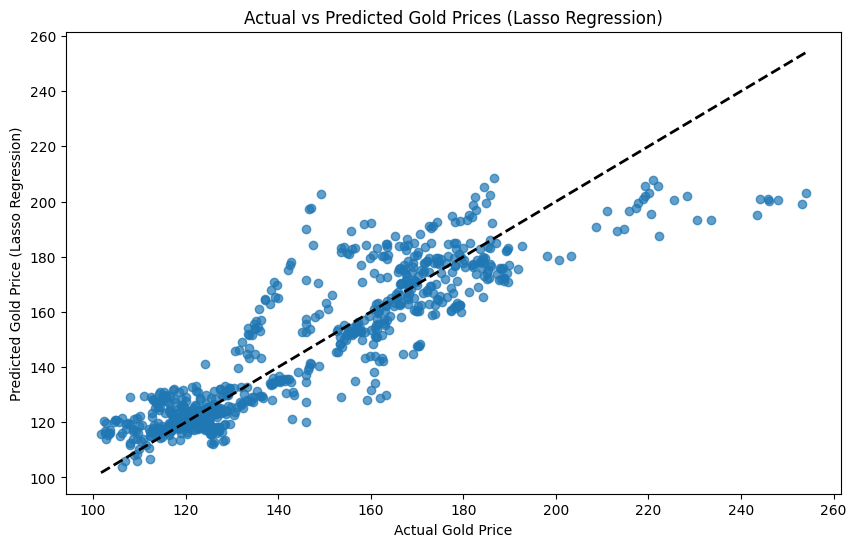

In [24]:
from sklearn.linear_model import Lasso  

lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
best_lasso = grid_search.best_estimator_
y_lasso_pred = best_lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)
print(f"Best alpha for Lasso Regression: {grid_search.best_params_['alpha']}")
print(f"Mean Absolute Error (Lasso Regression): {mae_lasso:.2f}")
print(f"Mean Squared Error (Lasso Regression): {mse_lasso:.2f}")
print(f"R^2 Score (Lasso Regression): {r2_lasso:.2f}")

coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients (Lasso Regression):")
print(coefficients)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lasso_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (Lasso Regression)")
plt.title("Actual vs Predicted Gold Prices (Lasso Regression)")
plt.show()

### 3.6. Support Vector Regression (SVR)

Support Vector Regression predicts continuous values by fitting a function within a defined error margin. It uses kernel functions to handle both linear relationships and complex non-linear patterns in data.

**Advantage:** Works well with high-dimensional, complex datasets and non-linear patterns

**Disadvantage:** Computationally intensive and requires careful tuning of kernels and parameters


Mean Absolute Error (SVR): 4.94
Mean Squared Error (SVR): 65.84
R^2 Score (SVR): 0.92


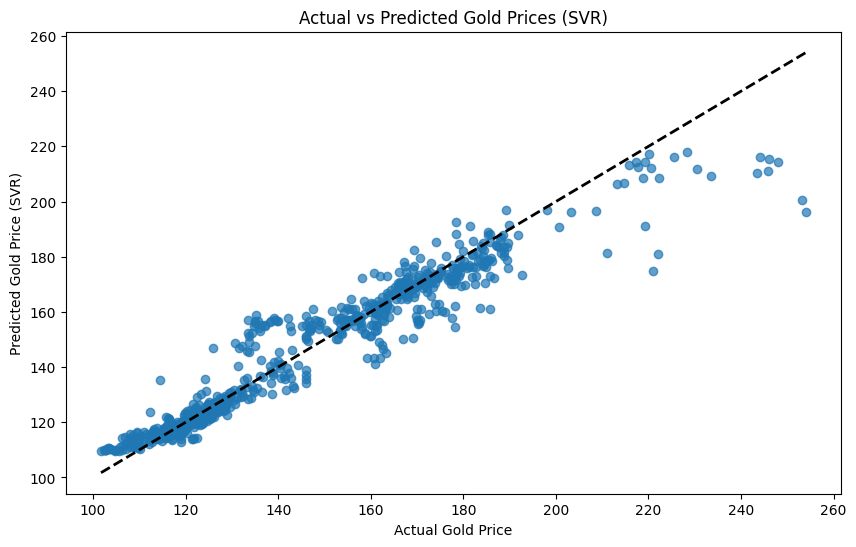

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_svr_pred = svr.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_svr_pred)
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)
print(f"Mean Absolute Error (SVR): {mae_svr:.2f}")
print(f"Mean Squared Error (SVR): {mse_svr:.2f}")
print(f"R^2 Score (SVR): {r2_svr:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_svr_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (SVR)")
plt.title("Actual vs Predicted Gold Prices (SVR)")
plt.show()

### 3.7. Decision Tre Regression 

Decision Tree Regression splits the data into hierarchical branches based on feature thresholds.. Each internal node represents a decision question and leaf nodes represent predicted continuous values. It learns patterns by recursively partitioning the data to minimize prediction errors.

**Advantage:** Easy to visualize and understand decision logic

**Disadvantage:** Easily overfits, especially when the tree becomes deep and complex

Mean Absolute Error (Decision Tree): 1.49
Mean Squared Error (Decision Tree): 7.56
R^2 Score (Decision Tree): 0.99


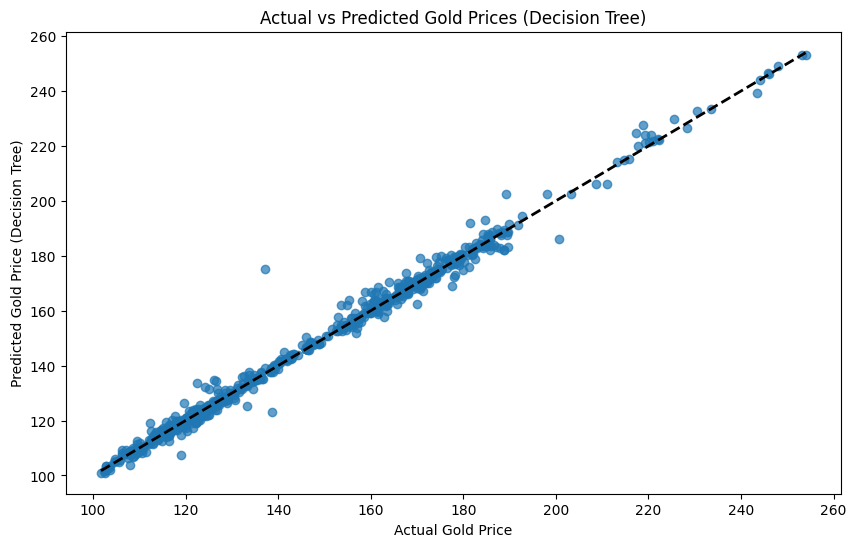

In [26]:
from sklearn.tree import DecisionTreeRegressor  

dt = DecisionTreeRegressor(random_state=42) 
dt.fit(X_train_scaled, y_train)
y_dt_pred = dt.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_dt_pred)
mse_dt = mean_squared_error(y_test, y_dt_pred)
r2_dt = r2_score(y_test, y_dt_pred)
print(f"Mean Absolute Error (Decision Tree): {mae_dt:.2f}")
print(f"Mean Squared Error (Decision Tree): {mse_dt:.2f}")
print(f"R^2 Score (Decision Tree): {r2_dt:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_dt_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (Decision Tree)")
plt.title("Actual vs Predicted Gold Prices (Decision Tree)")
plt.show()


### 3.8. Random Forest Regression 

Random Forest Regression is an ensemble method that builds multiple decision trees using different data samples and averages their predictions. This reduces the overfitting tendency of single trees and improves accuracy through diversity (bagging). Each tree captures a slightly different aspect of the data.

**Application:** Sales forecasting, demand planning, churn prediction

**Advantage:** High accuracy and robust performance even on noisy datasets

**Disadvantage:** Acts as a black-box model, making interpretation difficult due to many trees

Mean Absolute Error (Random Forest): 1.32
Mean Squared Error (Random Forest): 4.67
R^2 Score (Random Forest): 0.99


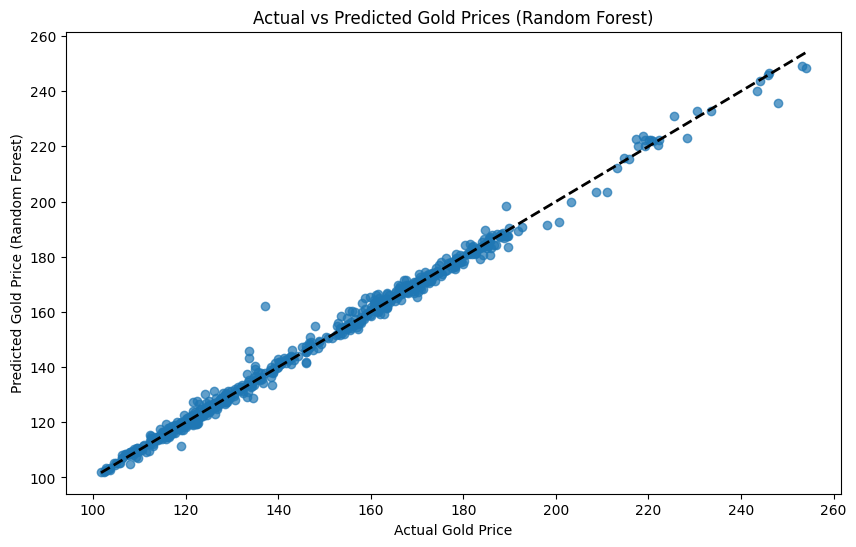

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_rf_pred = rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)
print(f"Mean Absolute Error (Random Forest): {mae_rf:.2f}")
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")
print(f"R^2 Score (Random Forest): {r2_rf:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price (Random Forest)")
plt.title("Actual vs Predicted Gold Prices (Random Forest)")
plt.show()

In [31]:
validation_accuracy = rf.score(X_test_scaled, y_test)
print(f"Validation Accuracy (Random Forest): {validation_accuracy:.2f}")

training_accuracy = rf.score(X_train_scaled, y_train)   
print(f"Training Accuracy (Random Forest): {training_accuracy:.2f}")

Validation Accuracy (Random Forest): 0.99
Training Accuracy (Random Forest): 1.00


## 4. Evaluation Metrics Graph

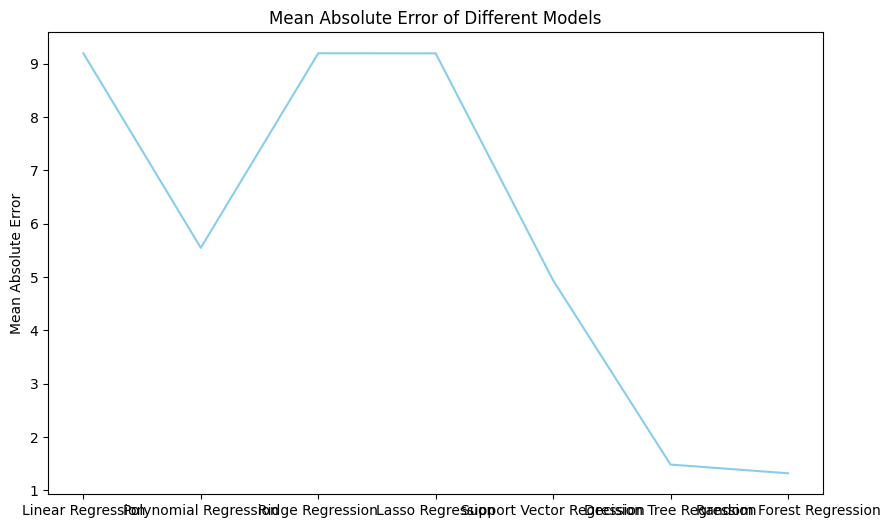

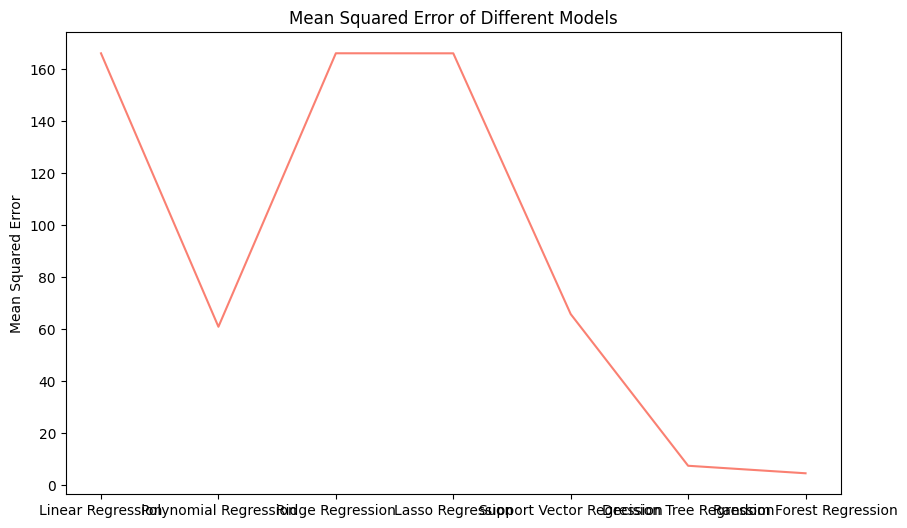

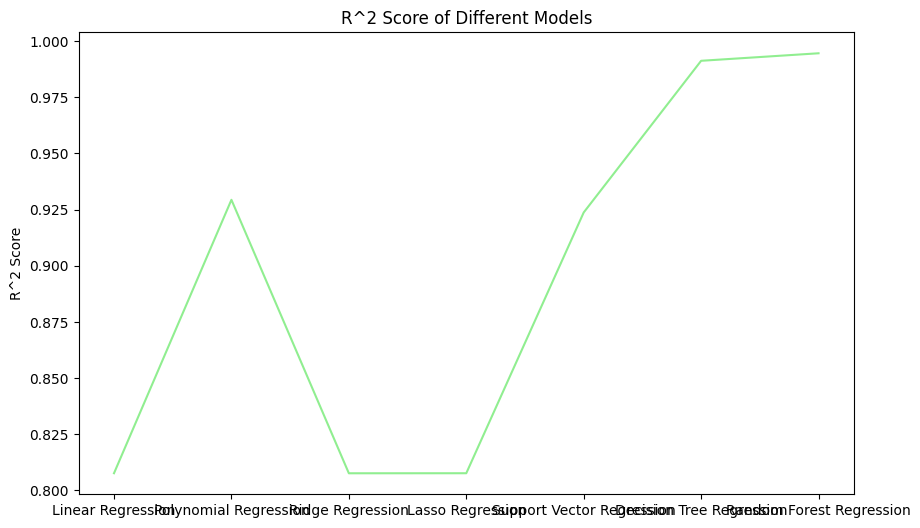

In [ ]:
models = {
    'Linear Regression': (y_lr_pred, mae, mse, r2),
    'Polynomial Regression': (y_poly_pred, mae_poly, mse_poly, r2_poly),
    'Ridge Regression': (y_ridge_pred, mae_ridge, mse_ridge, r2_ridge),
    'Lasso Regression': (y_lasso_pred, mae_lasso, mse_lasso, r2_lasso),
    'Support Vector Regression': (y_svr_pred, mae_svr, mse_svr, r2_svr),
    'Decision Tree Regression': (y_dt_pred, mae_dt, mse_dt, r2_dt),
    'Random Forest Regression': (y_rf_pred, mae_rf, mse_rf, r2_rf)
}

# mean absolute error graph
plt.figure(figsize=(10, 6))
mae_values = [metrics[1] for metrics in models.values()]
model_names = list(models.keys())
plt.plot(model_names, mae_values, color='skyblue')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Different Models')

# mean squared error graph
plt.figure(figsize=(10, 6))
mse_values = [metrics[2] for metrics in models.values()]
plt.plot(model_names, mse_values, color='salmon')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')

# R^2 score graph
plt.figure(figsize=(10, 6))
r2_values = [metrics[3] for metrics in models.values()]
plt.plot(model_names, r2_values, color='lightgreen')
plt.ylabel('R^2 Score')
plt.title('R^2 Score of Different Models')
plt.show()



After training models, Random Forest is top perfermer with an R square score very close to 0.99. 

## 5. Hyperparameter with Random Forest Regression

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

rfr_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='r2', 
    n_jobs=-1
)

rfr_random.fit(X_train, y_train)
print("Best Parameters:", rfr_random.best_params_)
print("Best CV Score (R²):", rfr_random.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best CV Score (neg MSE): 0.9911774646111203


In [35]:
import joblib

# Get best model from RandomizedSearchCV
best_rf = rfr_random.best_estimator_

# Save it to a file
joblib.dump(best_rf, "best_random_forest_regressor.pkl")

print("Model saved as best_random_forest_regressor.pkl")


Model saved as best_random_forest_regressor.pkl
